# Gurmukhi Handwritten Digit Classification

### Multiclass Classification with python from scratch 

## Problem statement:
- Gurmukhi is one of the popular Indian scripts widely used in Indian state of Punjab. In this part of the assignment,our goal is to develop a neural network solution (a simple NN, not a CNN) for classifying Gurmukhi digits.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
from glob import glob
import random

In [2]:
#path = 'C:/Users/sryarra/Downloads/IIIT/KK/GurNum/train'
path = './GurNum/train'
testratio = 0.2
#validatepath = 'C:/Users/sryarra/Downloads/IIIT/KK/GurNum/val'
validatepath = './GurNum/val'

In [3]:
myList = os.listdir(path)
images = []
classNo = []
valdateImages = []
validateclasses = []
val_noOfcls = os.listdir(validatepath)
noOfClasses = len(myList)
noOf_val_cls = len(val_noOfcls)
print(noOfClasses)
print(noOf_val_cls)

10
10


In [4]:
for x in range (0, noOf_val_cls):
    myPicList = os.listdir(validatepath + "/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(validatepath + "/"+str(x)+ "/"+y)
        curImg = cv2.resize(curImg,(28,28))
        valdateImages.append(curImg)
        validateclasses.append(x)
        
    print(x, end = " ")

0 1 2 3 4 5 6 7 8 9 

In [5]:
for x in range (0, noOfClasses):
    myPicList = os.listdir(path + "/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/"+str(x)+ "/"+y)
        curImg = cv2.resize(curImg,(28,28))
        images.append(curImg)
        classNo.append(x)
        
    print(x, end = " ")

0 1 2 3 4 5 6 7 8 9 

In [6]:
def plot_one_sample_of_each(base_path):
    CLASSES = [folder[len(base_path) + 1:] for folder in glob(base_path + '/*')]
    CLASSES.sort()
    cols = 5
    rows = int(np.ceil(len(CLASSES) / cols))
    fig = plt.figure(figsize=(50, 15))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.imread(imgs[0]))
        plt.title(cls)
        #sp.axis('off')

    plt.show()
    return

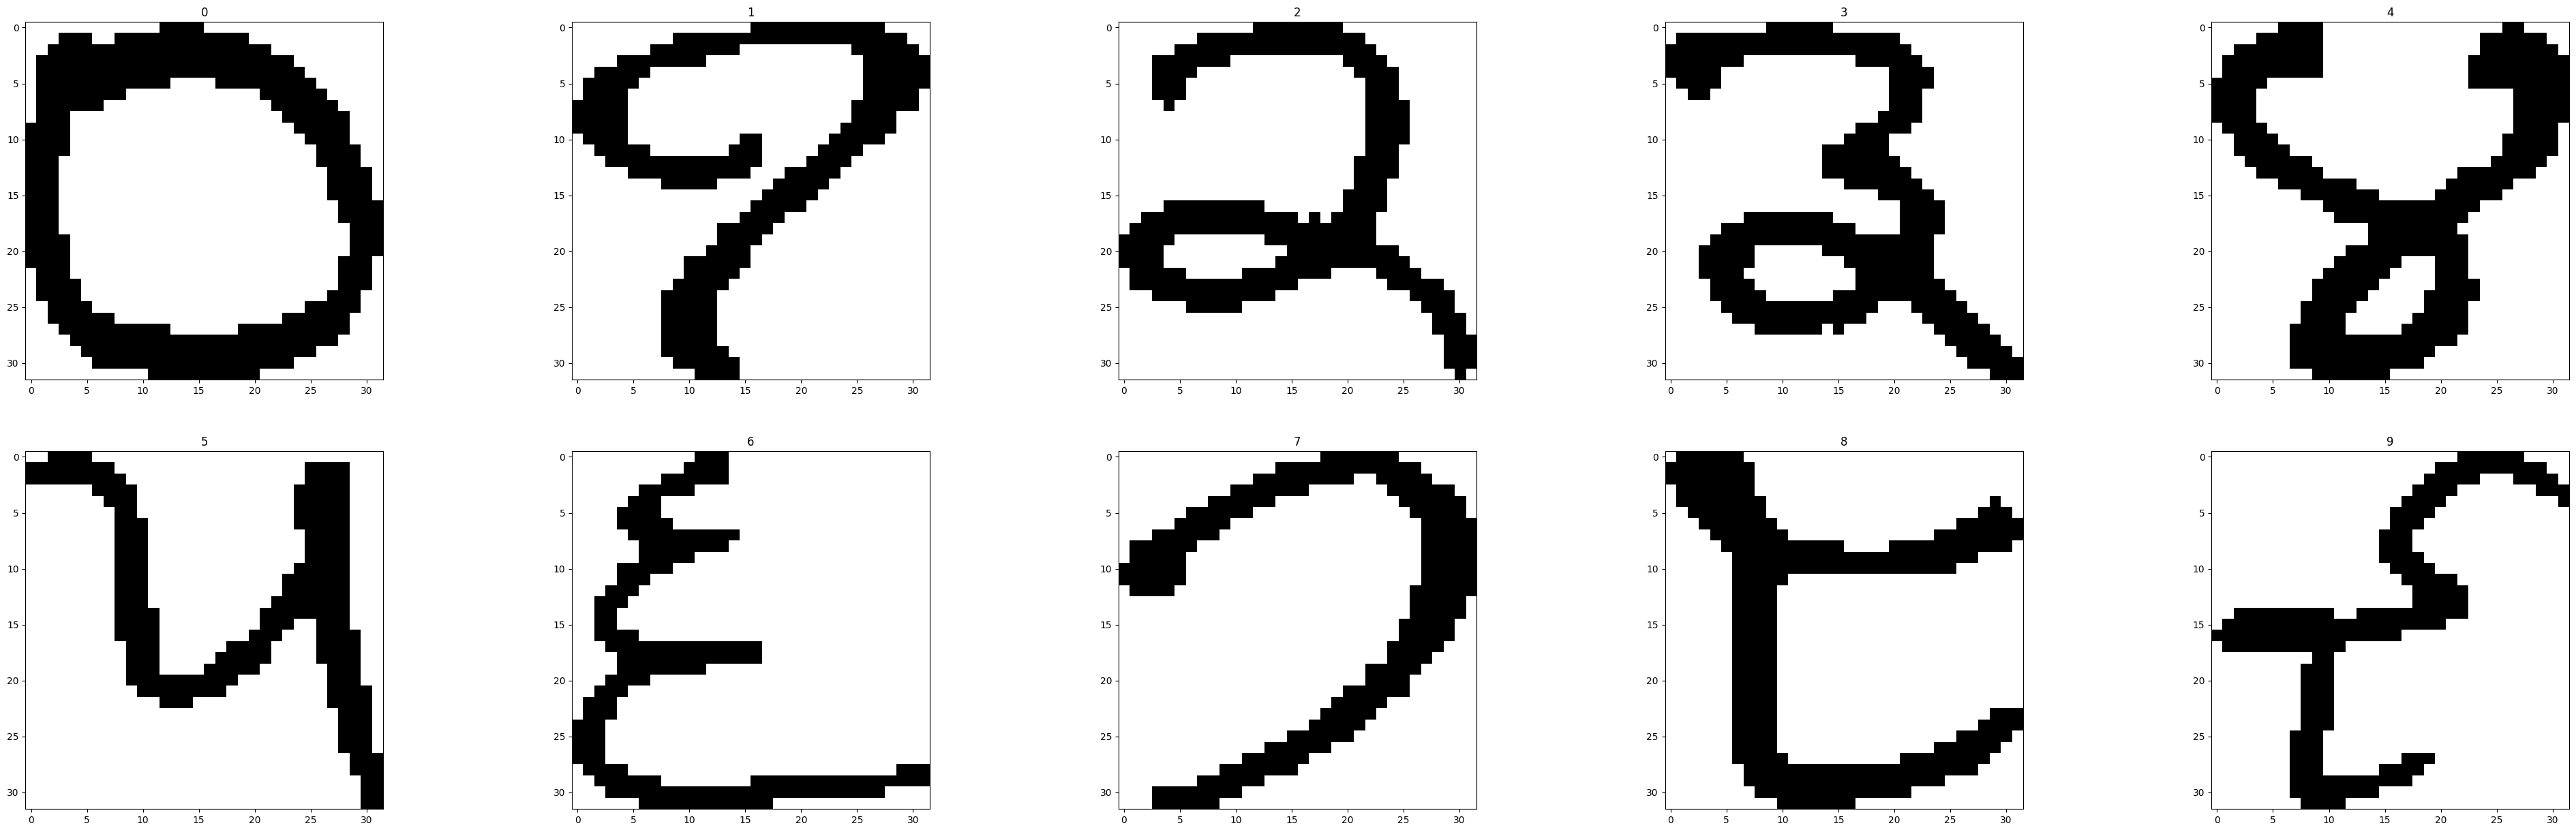

In [7]:
plot_one_sample_of_each(path)

In [8]:
print("length of train data ",len(images))
print("length of validate data ",len(valdateImages))

length of train data  1000
length of validate data  178


In [9]:
print("length of train classes ",len(classNo))
print("length of validate class ",len(validateclasses))

length of train classes  1000
length of validate class  178


In [10]:
images = np.array(images)
classNo = np.array(classNo)
print("train data images Shape")
print(images.shape)
print("train data class No shape ")
print(classNo.shape)

valdateImages = np.array(valdateImages)
validateclasses = np.array(validateclasses)
print("validate data images Shape")
print(valdateImages.shape)
print("validate data class No shape ")
print(validateclasses.shape)

train data images Shape
(1000, 28, 28, 3)
train data class No shape 
(1000,)
validate data images Shape
(178, 28, 28, 3)
validate data class No shape 
(178,)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.25)
print("X train data shape is ......",X_train.shape)
print("X test data shape is .......",X_test.shape)
print("Y train data shape is ......",y_train.shape)
print("Y test data shape is .......",y_test.shape)

X train data shape is ...... (750, 28, 28, 3)
X test data shape is ....... (250, 28, 28, 3)
Y train data shape is ...... (750,)
Y test data shape is ....... (250,)


In [12]:
X_train_flattened =(X_train.reshape(len(X_train), 28*28*3)).T
X_test_flattened =(X_test.reshape(len(X_test), 28*28*3)).T
valdateImagesflattened =(valdateImages.reshape(len(valdateImages), 28*28*3)).T

In [13]:
from keras.utils import np_utils

print("Shape before one-hot encoding: ", y_train.shape)
y_train = (np_utils.to_categorical(y_train, noOfClasses)).T
y_test = (np_utils.to_categorical(y_test, noOfClasses)).T
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (750,)
Shape after one-hot encoding:  (10, 750)


In [14]:
print("shape of X_train :", X_train_flattened.shape)
print("shape of Y_train :", y_train.shape)
print("shape of X_test :", X_test_flattened.shape)
print("shape of Y_test :", y_test.shape)

shape of X_train : (2352, 750)
shape of Y_train : (10, 750)
shape of X_test : (2352, 250)
shape of Y_test : (10, 250)


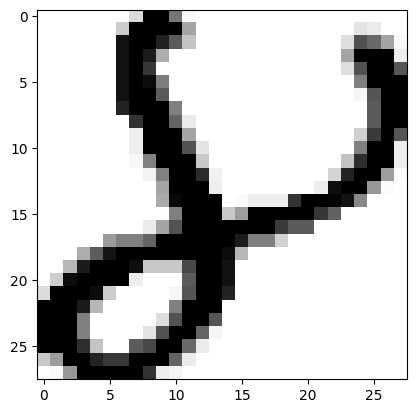

In [15]:
index = random.randrange(0, X_train_flattened.shape[1])
plt.imshow(X_train_flattened[:, index].reshape(28, 28, 3), cmap = 'gray')
plt.show()

## Model

## Initialize parameters Randomly
𝑊1=𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑛(𝑛1,𝑛0)
 
𝑏1=𝑛𝑝.𝑧𝑒𝑟𝑜𝑠((𝑛1,1))
 
𝑊2=𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑛(𝑛2,𝑛1)
 
𝑏2=𝑛𝑝.𝑧𝑒𝑟𝑜𝑠((𝑛2,1))
 
## *Repeat Below Steps for many times : *
## Forward Propagation
𝑍1=𝑊1∗𝑋+𝐵1
 
𝐴1=𝑓(𝑍1)
 

𝑍2=𝑊2∗𝐴1+𝐵2
 
𝐴2=𝑆𝑜𝑓𝑡𝑚𝑎𝑥(𝑍2)
 
## Softmax
𝑎𝑖=𝑒𝑧𝑖∑𝑛𝑖=𝑘𝑒𝑧𝑘
 
## Cost Function
𝐿𝑜𝑠𝑠=−∑𝑛𝑖=𝑘[𝑦𝑘∗𝑙𝑜𝑔(𝑎𝑘)]
 
𝐶𝑜𝑠𝑡=−1𝑚∑𝑚𝑖=1∑𝑛𝑘=1[𝑦𝑘∗𝑙𝑜𝑔(𝑎𝑘)]
 
## Backward Propagation
𝑑𝑍2=(𝐴2−𝑌)
 
𝑑𝑊2=1𝑚.𝑑𝑍2.𝐴𝑇1
 
𝑑𝐵2=1𝑚.𝑠𝑢𝑚(𝑑𝑍2,1)
 
𝑑𝑍1=𝑊𝑇2.𝑑𝑍2∗𝑓|1(𝑍1)
 
𝑑𝑊1=1𝑚.𝑑𝑍1.𝑋𝑇
 
𝑑𝐵1=1𝑚.𝑠𝑢𝑚(𝑑𝑍1,1)
 
## Updating Parameters¶
𝑊2=𝑊2−𝛼∗∂𝐶𝑜𝑠𝑡∂𝑊2
 

𝐵2=𝐵2−𝛼∗∂𝐶𝑜𝑠𝑡∂𝐵2
 

𝑊1=𝑊1−𝛼∗∂𝐶𝑜𝑠𝑡∂𝑊1
 

𝐵1=𝐵1−𝛼∗∂𝐶𝑜𝑠𝑡∂𝐵1

In [16]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [17]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

 ## Initialize Parameters
Note I multiplied 0.01 with weights W. But, this is still large, and that is the reason we saw increase in Cost value at the beginning, while training the model with ReLU function.
So, instead, you can multiply with 0.001, and it will solve the problem.

In [18]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Forward Propagation
𝑍1=𝑊1∗𝑋+𝐵1
 
𝐴1=𝑓(𝑍1)
 

𝑍2=𝑊2∗𝐴1+𝐵2
 
𝐴2=𝑆𝑜𝑓𝑡𝑚𝑎𝑥(𝑍2)

In [19]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

## Cost Function¶
𝐶𝑜𝑠𝑡=−1𝑚∑𝑚𝑖=1∑𝑛𝑘=1[𝑦𝑘∗𝑙𝑜𝑔(𝑎𝑘)]

In [20]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

## Backpropagation¶
𝑑𝑍2=(𝐴2−𝑌)
 
𝑑𝑊2=1𝑚.𝑑𝑍2.𝐴𝑇1
 
𝑑𝐵2=1𝑚.𝑠𝑢𝑚(𝑑𝑍2,1)
 
𝑑𝑍1=𝑊𝑇2.𝑑𝑍2∗𝑓|1(𝑍1)
 
𝑑𝑊1=1𝑚.𝑑𝑍1.𝑋𝑇
 
𝑑𝐵1=1𝑚.𝑠𝑢𝑚(𝑑𝑍1,1)

In [21]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

## Update Parameters

In [22]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Model

In [23]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [24]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train_flattened, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.362427014046553
Cost after 10 iterations is : 1.0714736234875875
Cost after 20 iterations is : 0.6400461374799391
Cost after 30 iterations is : 0.456567438694746
Cost after 40 iterations is : 0.35676743346146894
Cost after 50 iterations is : 0.2936649078741767
Cost after 60 iterations is : 0.24974997477460753
Cost after 70 iterations is : 0.21740137236443824
Cost after 80 iterations is : 0.19238536052995459
Cost after 90 iterations is : 0.17215317250273324


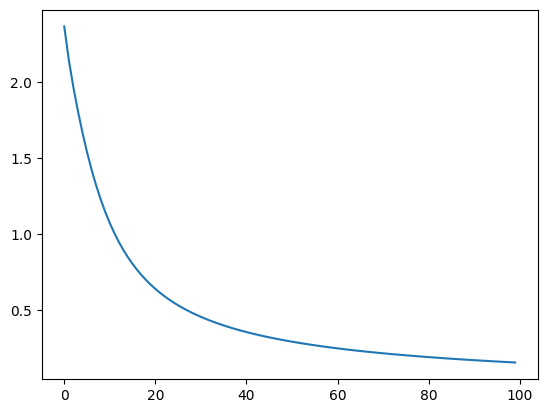

In [25]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [26]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [27]:
print("Accuracy of Train Dataset", accuracy(X_train_flattened, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test_flattened, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 98.8 %
Accuracy of Test Dataset 93.2 %


224


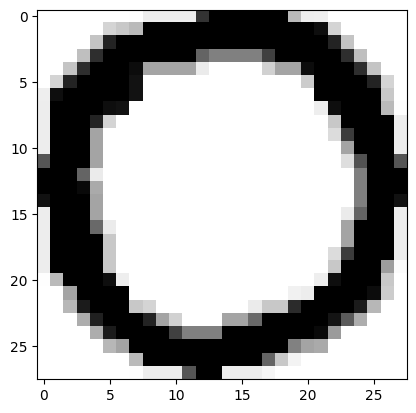

0
Our model says it is : 0


In [28]:
idx = int(random.randrange(0,X_test_flattened.shape[1]))
print(idx)
plt.imshow(X_test_flattened[:, idx].reshape((28,28,3)),cmap='gray')
plt.show()

cache = forward_propagation(X_test_flattened[:, idx].reshape(X_test_flattened[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
print(np.argmax(a_pred))
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

38


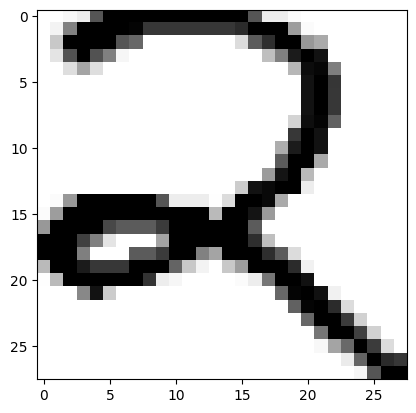

Our model says it is : 2


In [29]:
idx = int(random.randrange(0,valdateImagesflattened.shape[1]))
print(idx)
plt.imshow(valdateImagesflattened[:, idx].reshape((28,28,3)),cmap='gray')
plt.show()

cache = forward_propagation(valdateImagesflattened[:, idx].reshape(valdateImagesflattened[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

## Validation of the Model with Validation dataset

In [30]:
labels = []
classes = []
for idx in range(len(valdateImages)):
    #print(idx)
    #plt.imshow(valdateImagesflattened[:, idx].reshape((28,28,3)),cmap='gray')
    #plt.show()
    cache = forward_propagation(valdateImagesflattened[:, idx].reshape(valdateImagesflattened[:, idx].shape[0], 1), Parameters)
    a_pred = cache['a2']
    a_pred = np.argmax(a_pred, 0)
    labels.append(idx)
    classes.append(a_pred[0])
    print('label is ', idx, '....Our model says it is',a_pred[0] )
    #print("Our model says it is :", a_pred[0])

     

label is  0 ....Our model says it is 0
label is  1 ....Our model says it is 0
label is  2 ....Our model says it is 0
label is  3 ....Our model says it is 0
label is  4 ....Our model says it is 0
label is  5 ....Our model says it is 0
label is  6 ....Our model says it is 0
label is  7 ....Our model says it is 0
label is  8 ....Our model says it is 0
label is  9 ....Our model says it is 0
label is  10 ....Our model says it is 0
label is  11 ....Our model says it is 0
label is  12 ....Our model says it is 0
label is  13 ....Our model says it is 0
label is  14 ....Our model says it is 0
label is  15 ....Our model says it is 0
label is  16 ....Our model says it is 0
label is  17 ....Our model says it is 0
label is  18 ....Our model says it is 1
label is  19 ....Our model says it is 7
label is  20 ....Our model says it is 1
label is  21 ....Our model says it is 1
label is  22 ....Our model says it is 1
label is  23 ....Our model says it is 1
label is  24 ....Our model says it is 1
label is  